In [45]:
#Importation des librairies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:
#Importation du fichier CSV dans un dataframe

data = pd.read_csv('pic-journalier-consommation-brute.csv',encoding='utf-8', sep=';')

In [47]:
# voyons les 20 premières lignes du dataframe

data.head(20)

,Date,Pic journalier consommation (MW),Température moyenne (°C),Température référence (°C)
0,2012-01-01,59610.0,11.7,4.6
1,2012-01-04,78337.0,8.1,4.6
2,2012-01-13,78700.0,5.3,4.8
3,2012-01-14,74666.0,2.4,4.8
4,2012-01-19,80026.0,8.4,5.0
5,2012-01-26,77829.0,7.2,5.3
6,2012-01-27,76717.0,5.4,5.3
7,2012-01-30,87785.0,1.4,5.5
8,2012-02-06,96115.0,-3.3,5.9
9,2012-02-14,88913.0,3.1,6.3


In [48]:
# examinons la structure du dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              4077 non-null   object 
 1   Pic journalier consommation (MW)  4077 non-null   float64
 2   Température moyenne (°C)          4077 non-null   float64
 3   Température référence (°C)        4077 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.5+ KB


In [49]:
# nombre de lignes et de colonnes du dataframe

data.shape

(4077, 4)

In [50]:
# conversion des colonnes de date pour les mettre au bon format

data['Date'] = pd.to_datetime( data['Date'], format='%Y-%m-%d' )

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              4077 non-null   datetime64[ns]
 1   Pic journalier consommation (MW)  4077 non-null   float64       
 2   Température moyenne (°C)          4077 non-null   float64       
 3   Température référence (°C)        4077 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 127.5 KB


In [52]:
data.head(5)

,Date,Pic journalier consommation (MW),Température moyenne (°C),Température référence (°C)
0,2012-01-01,59610.0,11.7,4.6
1,2012-01-04,78337.0,8.1,4.6
2,2012-01-13,78700.0,5.3,4.8
3,2012-01-14,74666.0,2.4,4.8
4,2012-01-19,80026.0,8.4,5.0


In [53]:
# affichage du nombre de valeurs absentes (NaN) dans chaque colonne

data.isna().sum()

Date                                0
Pic journalier consommation (MW)    0
Température moyenne (°C)            0
Température référence (°C)          0
dtype: int64

In [54]:
# Nos données vont de quelle année à quelle année ?

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

print( data['Year'].sort_values(ascending = True).unique() )

[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [55]:
print( data['Month'].sort_values(ascending = True).unique() )

[ 1  2  3  4  5  6  7  8  9 10 11 12]


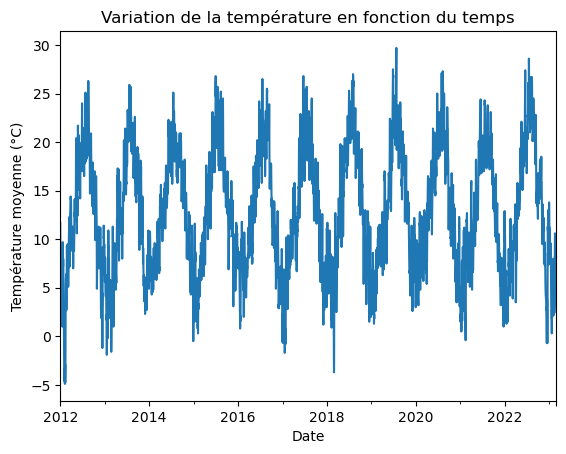

In [56]:
# Graphique de la variation de la température en fonction de chaque année

# Calculer la température moyenne de chaque année
temp_par_an = data.groupby("Date")["Température moyenne (°C)"].mean()

# Tracer la courbe
temp_par_an.plot(kind='line', x='Date', y='Température moyenne (°C)')

# Ajouter des labels pour les axes et le titre
plt.xlabel('Date')
plt.ylabel('Température moyenne (°C)')
plt.title('Variation de la température en fonction du temps')

# Afficher le graphique
plt.show()

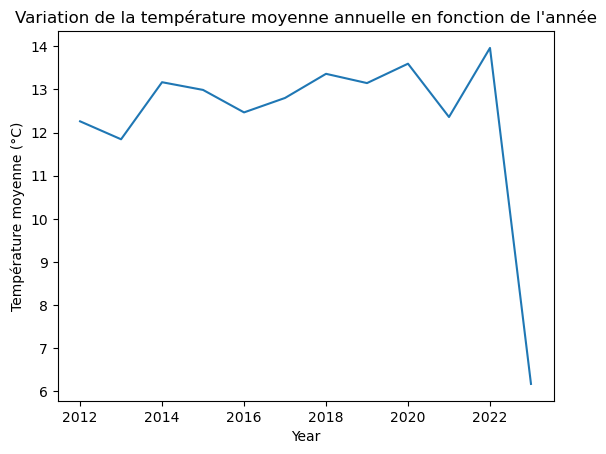

In [57]:
# Graphique de la variation de la température en fonction de chaque année

# Calculer la température moyenne de chaque année
temp_par_an = data.groupby("Year")["Température moyenne (°C)"].mean()

# Tracer la courbe
temp_par_an.plot(kind='line', x='Year', y='Température moyenne (°C)')

# Ajouter des labels pour les axes et le titre
plt.xlabel('Year')
plt.ylabel('Température moyenne (°C)')
plt.title("Variation de la température moyenne annuelle en fonction de l'année")

# Afficher le graphique
plt.show()

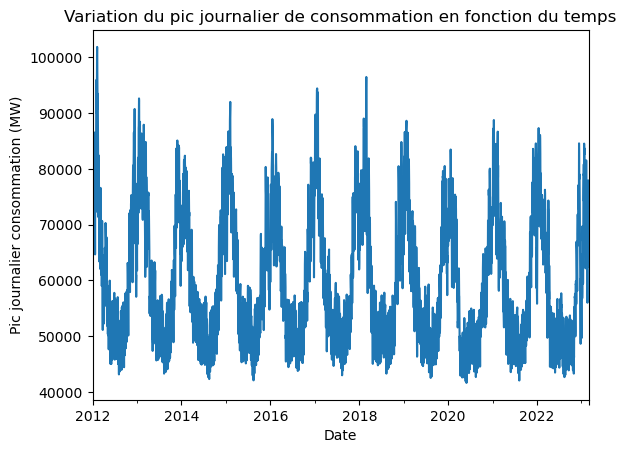

In [58]:
# Graphique de la variation du pic journalier de consommation en fonction de chaque année

# Calculer la température moyenne de chaque année
pic_jr_par_an = data.groupby("Date")["Pic journalier consommation (MW)"].mean()

# Tracer la courbe
pic_jr_par_an.plot(kind='line', x='Date', y='Pic journalier consommation (MW)')

# Ajouter des labels pour les axes et le titre
plt.xlabel('Date')
plt.ylabel('Pic journalier consommation (MW)')
plt.title('Variation du pic journalier de consommation en fonction du temps')

# Afficher le graphique
plt.show()

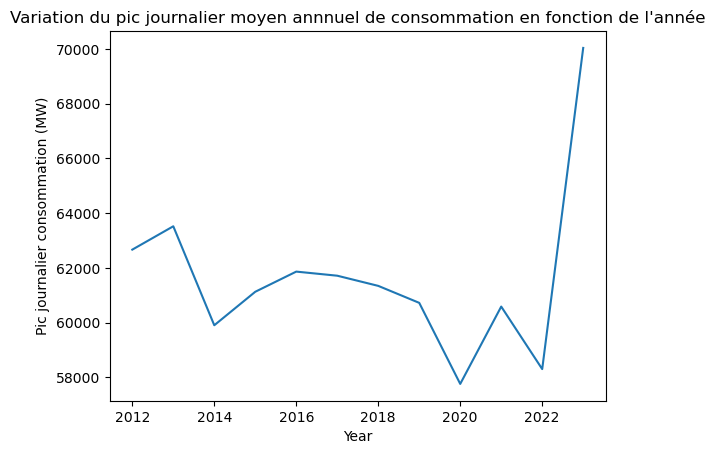

In [59]:
# Graphique de la variation du pic journalier de consommation en fonction de chaque année

# Calculer la température moyenne de chaque année
pic_jr_par_an = data.groupby("Year")["Pic journalier consommation (MW)"].mean()

# Tracer la courbe
pic_jr_par_an.plot(kind='line', x='Year', y='Pic journalier consommation (MW)')

# Ajouter des labels pour les axes et le titre
plt.xlabel('Year')
plt.ylabel('Pic journalier consommation (MW)')
plt.title("Variation du pic journalier moyen annnuel de consommation en fonction de l'année")

# Afficher le graphique
plt.show()

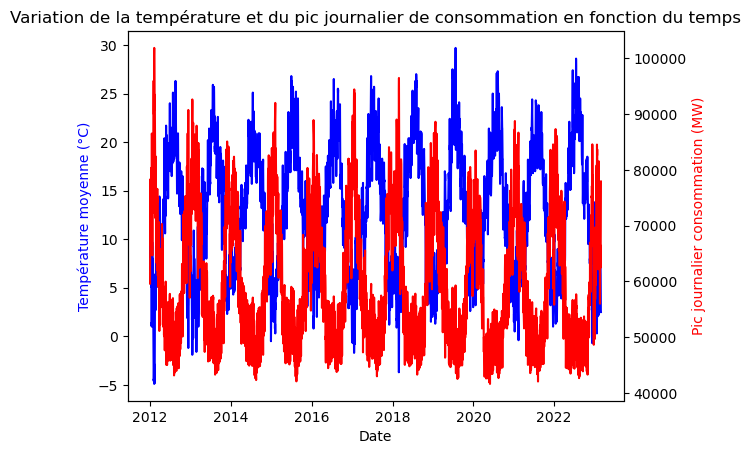

In [60]:
# Graphique de la variation de la température et du pic journalier de consommation en fonction de chaque année

# Calculer la température moyenne de chaque année
temp_par_an = data.groupby("Date")["Température moyenne (°C)"].mean()

# Calculer le pic journalier de consommation moyen de chaque année
pic_jr_par_an = data.groupby("Date")["Pic journalier consommation (MW)"].mean()

# Créer une figure et un axe principal
fig, ax1 = plt.subplots()

# Tracer la courbe de la température moyenne sur l'axe principal
ax1.plot(temp_par_an.index, temp_par_an.values, color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Température moyenne (°C)', color='blue')

# Créer un axe y secondaire pour le pic journalier de consommation
ax2 = ax1.twinx()

# Tracer la courbe du pic journalier de consommation sur l'axe y secondaire
ax2.plot(pic_jr_par_an.index, pic_jr_par_an.values, color='red')
ax2.set_ylabel('Pic journalier consommation (MW)', color='red')

# Ajouter un titre au graphique
plt.title('Variation de la température et du pic journalier de consommation en fonction du temps')

# Afficher le graphique
plt.show()


In [61]:
# Consommation globale moyenne par année

temperature_globale_par_annee = data[['Year', 'Température moyenne (°C)']].groupby('Year').mean().sort_values('Température moyenne (°C)', ascending = False).head(30)

temperature_globale_par_annee

,Température moyenne (°C)
Year,
2022,13.961918
2020,13.596175
2018,13.361370
2014,13.166849
2019,13.146575
2015,12.988219
2017,12.801918
2016,12.466940
2021,12.360000


In [62]:
Consommation_globale_par_annee = data[['Year', 'Pic journalier consommation (MW)']].groupby('Year').mean().sort_values('Pic journalier consommation (MW)', ascending = False).head(30)

Consommation_globale_par_annee

,Pic journalier consommation (MW)
Year,
2023,70040.728814
2013,63521.789041
2012,62668.543716
2016,61865.325137
2017,61715.572603
2018,61343.936986
2015,61128.561644
2019,60723.200000
2021,60587.328767


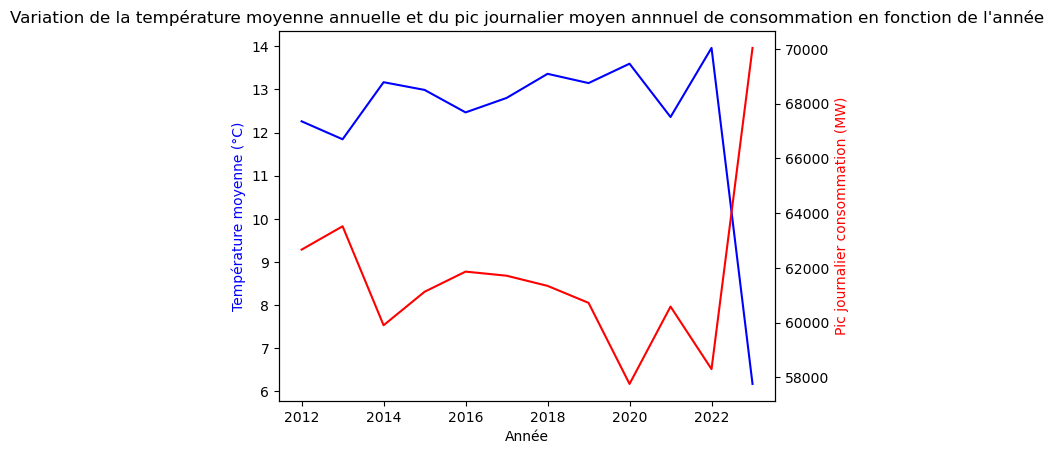

In [63]:
import matplotlib.pyplot as plt

# Calculer la température moyenne de chaque année
temp_par_an = data.groupby("Year")["Température moyenne (°C)"].mean()

# Calculer le pic journalier de consommation moyen de chaque année
pic_jr_par_an = data.groupby("Year")["Pic journalier consommation (MW)"].mean()

# Créer une figure et un axe principal
fig, ax1 = plt.subplots()

# Tracer la courbe de la température moyenne sur l'axe principal
ax1.plot(temp_par_an.index, temp_par_an.values, color='blue')
ax1.set_xlabel('Année')
ax1.set_ylabel('Température moyenne (°C)', color='blue')

# Créer un axe y secondaire pour le pic journalier de consommation
ax2 = ax1.twinx()

# Tracer la courbe du pic journalier de consommation sur l'axe y secondaire
ax2.plot(pic_jr_par_an.index, pic_jr_par_an.values, color='red')
ax2.set_ylabel('Pic journalier consommation (MW)', color='red')

# Ajouter un titre au graphique
plt.title("Variation de la température moyenne annuelle et du pic journalier moyen annnuel de consommation en fonction de l'année")

# Afficher le graphique
plt.show()
